# 2CSSID Workshop03. Neural networks' tools (Tensorflow)

<p style='text-align: right;font-style: italic; color: red;'>Designed by: Mr. Abdelkrime Aries</p>

In [1]:
# Sometimes, TensorFlow throws errors when there is no GPU. 
# To stop these messages, we can use this code:
import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.20.0'

In [14]:
import pandas     as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

pd.__version__

'2.3.3'

In [4]:
from typing import Literal, List

## I. Data Preparation

In [6]:
df_train = pd.read_csv('data/sat.trn', delimiter=' ', header=None)
X_train = df_train.iloc[:, :-1].values
Y_train = df_train.iloc[:, -1].values
lb = LabelBinarizer()

In [7]:
X_train = X_train/255
Y_train = lb.fit_transform(Y_train)

X_train = tf.constant(X_train, dtype=tf.float32)
Y_train = tf.constant(Y_train, dtype=tf.float32)

X_train.shape, Y_train.shape

(TensorShape([4435, 36]), TensorShape([4435, 6]))

In [8]:
df_test = pd.read_csv('data/sat.tst', delimiter=' ', header=None)
X_test = df_test.iloc[:, :-1].values
Y_test = df_test.iloc[:, -1].values
X_test = X_test/255
# Y_test = lb.transform(Y_test)

X_test = tf.constant(X_test, dtype=tf.float32)

X_test.shape, Y_test.shape

(TensorShape([2000, 36]), (2000,))

## II. Keras

### II.1. Sequential model

In [10]:
nn1 = keras.Sequential()
nn1.add(keras.Input(shape=(X_train.shape[1],)))
nn1.add(keras.layers.Dense(10, activation='relu'))
nn1.add(keras.layers.Dense(10, activation='relu'))

# determine number of classes robustly (works if Y_train is 1D labels or one-hot)
if getattr(Y_train, "ndim", None) is not None and Y_train.ndim > 1:
	n_classes = int(Y_train.shape[1])
elif getattr(Y_train, "shape", None) is not None and len(Y_train.shape) > 1:
	n_classes = int(Y_train.shape[1])
else:
	# fallback: count unique labels
	n_classes = int(len(np.unique(Y_train)))

nn1.add(keras.layers.Dense(n_classes, activation='softmax'))

nn1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 546 (2.13 KB)

 Trainable params: 546 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

### II.2. Model training

In [11]:
# simple callback to print status every epoch (fix for NameError)
class PrintEveryPrEpochs(keras.callbacks.Callback):
    def __init__(self, print_every: int = 1):
        super().__init__()
        self.print_every = max(1, int(print_every))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        if (epoch + 1) % self.print_every == 0:
            loss = logs.get('loss')
            acc = logs.get('accuracy') or logs.get('acc')
            val_loss = logs.get('val_loss')
            msg = f"Epoch {epoch+1}: loss={loss:.4f}" if loss is not None else f"Epoch {epoch+1}"
            if acc is not None:
                msg += f", acc={acc:.4f}"
            if val_loss is not None:
                msg += f", val_loss={val_loss:.4f}"
            print(msg)

In [12]:
nn1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.losses.CategoricalCrossentropy(),
)

nn1.fit(X_train, Y_train, epochs=100, callbacks=[PrintEveryPrEpochs()], verbose=0)

Epoch 1: loss=1.3539
Epoch 2: loss=0.7614
Epoch 3: loss=0.5792
Epoch 4: loss=0.4987
Epoch 5: loss=0.4573
Epoch 6: loss=0.4461
Epoch 7: loss=0.4214
Epoch 8: loss=0.4239
Epoch 9: loss=0.4159
Epoch 10: loss=0.4250
Epoch 11: loss=0.4112
Epoch 12: loss=0.3979
Epoch 13: loss=0.3938
Epoch 14: loss=0.3819
Epoch 15: loss=0.3999
Epoch 16: loss=0.3754
Epoch 17: loss=0.3723
Epoch 18: loss=0.3681
Epoch 19: loss=0.3771
Epoch 20: loss=0.3798
Epoch 21: loss=0.3609
Epoch 22: loss=0.3651
Epoch 23: loss=0.3709
Epoch 24: loss=0.3704
Epoch 25: loss=0.3579
Epoch 26: loss=0.3728
Epoch 27: loss=0.3757
Epoch 28: loss=0.3560
Epoch 29: loss=0.3576
Epoch 30: loss=0.3700
Epoch 31: loss=0.3554
Epoch 32: loss=0.3651
Epoch 33: loss=0.3525
Epoch 34: loss=0.3596
Epoch 35: loss=0.3618
Epoch 36: loss=0.3594
Epoch 37: loss=0.3475
Epoch 38: loss=0.3639
Epoch 39: loss=0.3497
Epoch 40: loss=0.3531
Epoch 41: loss=0.3599
Epoch 42: loss=0.3540
Epoch 43: loss=0.3582
Epoch 44: loss=0.3509
Epoch 45: loss=0.3443
Epoch 46: loss=0.34

### II.3. Model testing

In [13]:
y_pred_probs = nn1.predict(X_test)
# Convert predicted probabilities to class labels
y_pred_classes = lb.inverse_transform(y_pred_probs)

cr = classification_report(Y_test, y_pred_classes)
print(cr)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       461
           2       0.92      0.95      0.94       224
           3       0.79      0.97      0.88       397
           4       0.63      0.36      0.46       211
           5       0.84      0.84      0.84       237
           7       0.84      0.83      0.84       470

    accuracy                           0.86      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.85      0.86      0.85      2000



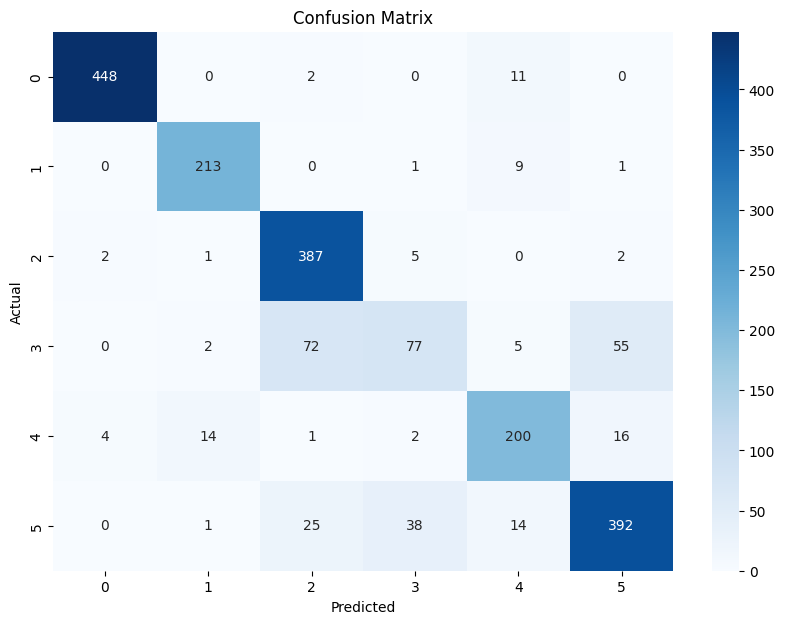

In [15]:
cm = confusion_matrix(Y_test, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## III. High level with a custom class

### III.1. Custom Layer

In [21]:
# MyLayer in here
class MyLayer(keras.layers.Dense):
    def __init__(self, 
                    nb_in:int, nb_out: int, 
                    bias: bool = True, act: Literal['relu', 'sigmoid', 'linear'] = 'linear'):
        assert nb_in   > 0
        assert nb_out  > 0
        super().__init__(nb_out, use_bias=bias, activation=act)

        self.build((nb_in,))


MyLayer(3, 2)

<MyLayer name=my_layer, built=True>

In [22]:
# Must print an 'Exception' or 'AssertionError'

try:
    ml1 = MyLayer(0, 2)
except Exception as e:
    print(repr(e))

print('end')

AssertionError()
end


In [24]:
l2ts = [
    MyLayer(3, 2, bias=False, act='relu'),
    MyLayer(3, 2, bias=True, act='sigmoid'),
    MyLayer(3, 1)
    ]

XX = tf.constant([[1, 2, 3], [4, 5, 6]])

for l in l2ts:
    print('===============================')
    print(l)
    print('-------------------------------')
    print('bias=', l.bias)
    weight = l.kernel
    print('output=', l(XX))

<MyLayer name=my_layer_1, built=True>
-------------------------------
bias= None
output= tf.Tensor(
[[2.4862247 0.6629865]
 [3.7985573 2.466023 ]], shape=(2, 2), dtype=float32)
<MyLayer name=my_layer_2, built=True>
-------------------------------
bias= <Variable path=my_layer_2/bias, shape=(2,), dtype=float32, value=[0. 0.]>
output= tf.Tensor(
[[0.26955882 0.16843219]
 [0.07587055 0.07647398]], shape=(2, 2), dtype=float32)
<MyLayer name=my_layer_3, built=True>
-------------------------------
bias= <Variable path=my_layer_3/bias, shape=(1,), dtype=float32, value=[0.]>
output= tf.Tensor(
[[-3.5869465]
 [-8.208622 ]], shape=(2, 1), dtype=float32)


### III.2. Custom Net

In [26]:
class MyMLP(keras.Model):
    def __init__(self):
        super().__init__()
        self.layers_list = []
        self.locked = False

    def add_layer(self, layer: MyLayer):
        if self.locked:
            raise Exception("Cannot add layers after the model is locked.")
        out_nbr = None
        if len(self.layers_list):
            out_nbr = self.layers_list[-1].kernel.shape[1]
        in_nbr = layer.kernel.shape[0]
        if out_nbr is not None and out_nbr != in_nbr:
            raise Exception(f'The last layer outputs ({out_nbr}) must be the same as this layer input {in_nbr}')
        self.layers_list.append(layer)
        return self
    
    def compile(self, nb_in=1, nb_out=1, bias=True, multiclass=False, lr=1.):
        if len(self.layers_list):
            nb_in = self.layers_list[-1].kernel.shape[1]

        loss = keras.losses.BinaryCrossentropy()
        act = 'sigmoid'
        if multiclass and nb_out > 1:
            act='softmax'
            loss = keras.losses.CategoricalCrossentropy()
        self.layers_list.append(MyLayer(nb_in, nb_out, bias=bias, act=act))
        optimizer = keras.optimizers.Adam(learning_rate=0.01)
        self.locked = True
        super().compile(optimizer=optimizer, loss=loss)

    def forward(self, X):
        Z = X 
        for layer in self.layers_list:
            Z = layer(Z)
        return Z

    def __call__(self, X):
        return self.forward(X)
        

### III.3. Model training

In [29]:
nn2 = MyMLP()
nn2.add_layer(MyLayer(X_train.shape[1], 10, act='relu'))\
    .add_layer(MyLayer(10, 10, act='relu'))\
    .compile(nb_out=int(Y_train.shape[1]), lr=0.01, multiclass=True)

nn2.summary()

Model: "my_mlp_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_layer_7 (MyLayer)            │ (10)                   │           370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_layer_8 (MyLayer)            │ (10)                   │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_layer_9 (MyLayer)            │ (6)                    │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 546 (2.13 KB)

 Trainable params: 546 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
nn2.fit(X_train, Y_train, epochs=100, callbacks=[PrintEveryPrEpochs()], verbose=0)

Epoch 1: loss=1.2332
Epoch 2: loss=0.7509
Epoch 3: loss=0.5942
Epoch 4: loss=0.5260
Epoch 5: loss=0.4850
Epoch 6: loss=0.4724
Epoch 7: loss=0.4590
Epoch 8: loss=0.4495
Epoch 9: loss=0.4480
Epoch 10: loss=0.4528
Epoch 11: loss=0.4444
Epoch 12: loss=0.4453
Epoch 13: loss=0.4332
Epoch 14: loss=0.4509
Epoch 15: loss=0.4490
Epoch 16: loss=0.4280
Epoch 17: loss=0.4288
Epoch 18: loss=0.4430
Epoch 19: loss=0.4409
Epoch 20: loss=0.4127
Epoch 21: loss=0.4273
Epoch 22: loss=0.4337
Epoch 23: loss=0.4144
Epoch 24: loss=0.4042
Epoch 25: loss=0.4158
Epoch 26: loss=0.4076
Epoch 27: loss=0.4025
Epoch 28: loss=0.4039
Epoch 29: loss=0.4041
Epoch 30: loss=0.4172
Epoch 31: loss=0.4100
Epoch 32: loss=0.3958
Epoch 33: loss=0.3996
Epoch 34: loss=0.3961
Epoch 35: loss=0.3952
Epoch 36: loss=0.3944
Epoch 37: loss=0.4029
Epoch 38: loss=0.3964
Epoch 39: loss=0.3880
Epoch 40: loss=0.3891
Epoch 41: loss=0.3957
Epoch 42: loss=0.4010
Epoch 43: loss=0.3894
Epoch 44: loss=0.3821
Epoch 45: loss=0.3843
Epoch 46: loss=0.36

### III.4. Model testing

In [31]:
y_pred_probs_2 = nn2.predict(X_test)
# Convert predicted probabilities to class labels
y_pred_classes_2 = lb.inverse_transform(y_pred_probs_2)

cr = classification_report(Y_test, y_pred_classes_2)
print(cr)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           1       0.99      0.96      0.97       461
           2       0.93      0.93      0.93       224
           3       0.89      0.92      0.90       397
           4       0.50      0.21      0.30       211
           5       0.80      0.84      0.82       237
           7       0.74      0.90      0.81       470

    accuracy                           0.84      2000
   macro avg       0.81      0.80      0.79      2000
weighted avg       0.83      0.84      0.83      2000



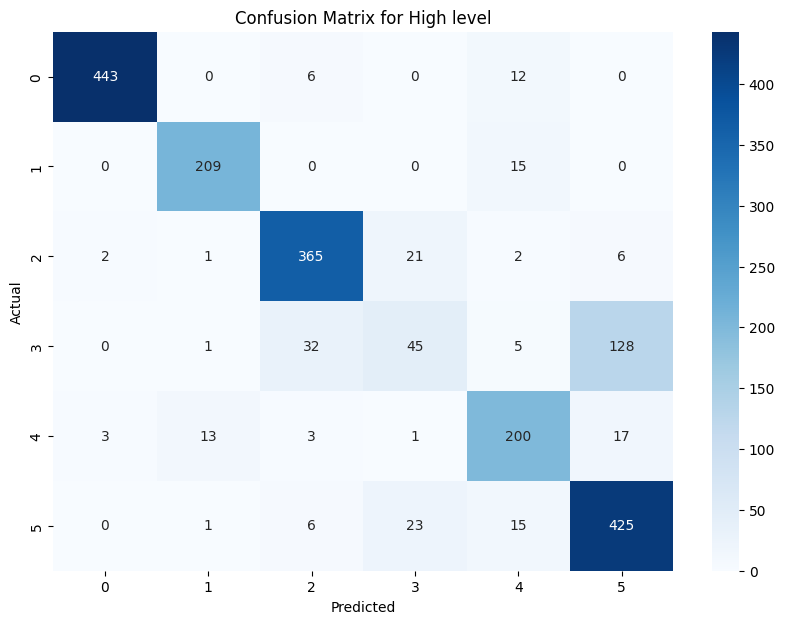

In [59]:
cm_2 = confusion_matrix(Y_test, y_pred_classes_2)
plt.figure(figsize=(10,7))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for High level')
plt.show()

## IV. Low level

### IV.1. Activation functions

In [42]:
def simple_sigmoid(x):
    return 1 / (1 + tf.exp(-x))

def simple_ReLU(x):
    return tf.where(x > 0, x, 0)

def simple_softmax(x):
    H = tf.math.exp(x)
    return H / tf.reshape(tf.math.reduce_sum(H, axis=1), (-1, 1))

In [43]:
XX = tf.constant([[1., -1., 0.], [-0.5, 0.2, 5]])
print(simple_sigmoid(XX))
print(simple_ReLU(XX))
print(simple_softmax(XX))

tf.Tensor(
[[0.7310586  0.26894143 0.5       ]
 [0.37754068 0.54983395 0.9933072 ]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1.  0.  0. ]
 [0.  0.2 5. ]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.66524094 0.09003058 0.24472848]
 [0.00403705 0.00812962 0.9878334 ]], shape=(2, 3), dtype=float32)


### IV.2. Loss functions

In [46]:
class SimpleBCE(keras.Loss):
    def call(self, H, Y):
        return tf.reduce_mean(-(Y * tf.math.log(H) + (1 - Y) * tf.math.log(1 - H)))

class SimpleCE(keras.Loss):
    def call(self, H, Y):
        return tf.reduce_mean(- Y * tf.math.log(H))

### IV.3. Optimization functions

In [47]:
class SimpleGD(keras.Optimizer):
    def __init__(self, learning_rate=0.001):
        super().__init__(learning_rate)
    def apply_gradients(self, grads_and_vars):
        for grad, var in grads_and_vars:
            var.assign_sub(self.learning_rate * grad)

### IV.4. Custom Layer

In [48]:
# SimpleLayer in here
class SimpleLayer(object):
    def __init__(self, 
                    nb_in:int, nb_out: int, 
                    bias: bool = True, act: Literal['relu', 'sigmoid', 'linear'] = 'linear'):
        assert nb_in   > 0
        assert nb_out  > 0
        super().__init__()

        self.W = tf.Variable(tf.zeros([nb_in, nb_out]))
        self.trainable_weights = [self.W]
        self.b = tf.zeros([1   , nb_out])
        if bias:
            self.b = tf.Variable(self.b)
            self.trainable_weights.append(self.b)

        self.act = lambda x: x
        if act == 'relu':
            self.act = simple_ReLU
        elif act == 'sigmoid':
            self.act = simple_sigmoid

    def randomize(self):
        self.W.assign(tf.random.normal(self.W.shape, mean=0.0, stddev=0.1))
        if isinstance(self.b, tf.Variable):
            self.b.assign(tf.random.normal(self.b.shape, mean=0.0, stddev=0.1))

    def forward(self, x):
        return self.act(tf.matmul(x, self.W) + self.b)
    
    def __call__(self, x):
        return self.forward(x)
    
SimpleLayer(3, 2)


In [49]:
sl = SimpleLayer(3, 2, bias=False)

sl.randomize()
sl.b, sl.W, sl.trainable_weights

(<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0., 0.]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
 array([[ 0.10165943, -0.05621861],
        [-0.01860264,  0.14163922],
        [-0.01935767,  0.11617891]], dtype=float32)>,
 [<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
  array([[ 0.10165943, -0.05621861],
         [-0.01860264,  0.14163922],
         [-0.01935767,  0.11617891]], dtype=float32)>])

### IV.5. Custom Net

In [50]:
class SimpleMLP(object):
    def __init__(self):
        super().__init__()
        self.layers = []
        self.locked = False
        self.trainable_weights = []
    
    def add_layer(self, layer: SimpleLayer):
        if self.locked:
            raise Exception('You cannot add more layers')
        out_nbr = None
        if len(self.layers):
            out_nbr = self.layers[-1].W.shape[1]
        in_nbr = layer.W.shape[0]
        if out_nbr is not None and out_nbr != in_nbr:
            raise Exception(f'The last layer outputs ({out_nbr}) must be the same as this layer input {in_nbr}')
        self.layers.append(layer)
        self.trainable_weights.extend(layer.trainable_weights)
        return self
        
    def compile(self, nb_in=1, nb_out=1, bias=True, multiclass=False, lr=1.):
        if len(self.layers):
            nb_in = self.layers[-1].W.shape[1]
        out_layer = SimpleLayer(nb_in, nb_out, bias=bias, act='sigmoid')
        self.loss = SimpleBCE()
        if multiclass and nb_out > 1:
            out_layer.act = simple_softmax
            self.loss = SimpleCE()
        self.layers.append(out_layer)
        self.trainable_weights.extend(self.layers[-1].trainable_weights)
        self.optimizer = SimpleGD(learning_rate=lr)
        self.locked = True
        

    def forward(self, X):
        Z = X 
        for layer in self.layers:
            Z = layer(Z)
        return Z
    
    def backward(self, X, Y):
        with tf.GradientTape() as tape:
            Y_pred = self.forward(X)
            loss   = self.loss(Y_pred, Y)
        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return loss.numpy()
    
    def fit(self, X, Y, epochs=20, pr: int=100):
        for epoch in range(epochs):
            loss = self.backward(X, Y)
            if not epoch%pr:
                print('epoch', epoch, ' loss =', loss)
    
    def randomize(self):
        for layer in self.layers:
            layer.randomize()
            
    def __call__(self, X):
        return self.forward(X)

In [51]:
# Result:
# tf.Tensor(
# [[0.8400944]
#  [0.8428117]], shape=(2, 1), dtype=float32)
# learning_rate 1.0
# 1.0020916
# <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
# array([[0.51494634],
#        [0.5659208 ]], dtype=float32)>

nn3t = SimpleMLP()
nn3t.add_layer(SimpleLayer(2, 2, act='sigmoid'))\
    .add_layer(SimpleLayer(2, 2, act='sigmoid'))\
    .compile()


nn3t.layers[0].W.assign_add(tf.constant([[0.5, 0.3], [0.2, 0.4]]))
nn3t.layers[0].b.assign_add(tf.constant([[-0.3, 0.5]]))
nn3t.layers[1].W.assign_add(tf.constant([[0.3, -0.1], [0.5, -0.3]]))
nn3t.layers[1].b.assign_add(tf.constant([[-0.3, -0.2]]))
nn3t.layers[2].W.assign_add(tf.constant([[0.7], [0.7]]))
nn3t.layers[2].b.assign_add(tf.constant([[1.]]))

XX = tf.constant([[2, -1], [3, 5]], dtype=tf.float32)
YY = tf.constant([[0], [1]], dtype=tf.float32)

print(nn3t.forward(XX))

loss = nn3t.backward(XX, YY)

print(loss)

nn3t.layers[2].W

tf.Tensor(
[[0.8400944]
 [0.8428117]], shape=(2, 1), dtype=float32)
1.0020916


<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.51494634],
       [0.5659208 ]], dtype=float32)>

### IV.6. Model training

In [52]:
nn3 = SimpleMLP()
nn3.add_layer(SimpleLayer(X_train.shape[1], 10, act='relu'))\
    .add_layer(SimpleLayer(10, 10, act='relu'))\
    .compile(nb_out=int(Y_train.shape[1]), lr=0.01, multiclass=True)

nn3.randomize()

list(nn3.trainable_weights)

[<tf.Variable 'Variable:0' shape=(36, 10) dtype=float32, numpy=
 array([[ 0.05183417, -0.01786205,  0.06636249, -0.09282586,  0.04913518,
          0.10718127, -0.08815784, -0.10379793,  0.19211681, -0.16207922],
        [ 0.08302256,  0.09410691,  0.01929435, -0.03762623,  0.03200607,
         -0.0018498 , -0.08332778, -0.03318013, -0.1742397 ,  0.09957664],
        [ 0.00883834, -0.00262872,  0.04968698, -0.12972218,  0.00066189,
          0.11448095, -0.21588746,  0.13108937,  0.14820144,  0.09682593],
        [ 0.11664976,  0.15444404,  0.14213997, -0.3289746 ,  0.19668464,
          0.0450783 , -0.06746566,  0.11927853, -0.02368977, -0.02237061],
        [-0.03072264,  0.04664829,  0.0386461 , -0.08594856,  0.04320708,
         -0.03001854, -0.04130645,  0.02973274, -0.01192069, -0.04747568],
        [ 0.14404483,  0.04178895, -0.11091794, -0.049756  ,  0.11392409,
          0.01726479, -0.20310293,  0.02451033, -0.01434262,  0.03206117],
        [-0.05800382, -0.03120468, -0.1016

In [54]:
nn3.fit(X_train, Y_train, epochs=100)

epoch 0  loss = 0.2950625


### IV.7. Model testing

In [57]:
# get numpy array from the tf.Tensor before using sklearn utilities
y_pred_probs_3 = nn3(X_test).numpy()
# Convert predicted probabilities to class labels
y_pred_classes_3 = lb.inverse_transform(y_pred_probs_3)

cr_3 = classification_report(Y_test, y_pred_classes_3)
print(cr_3)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       461
           2       0.00      0.00      0.00       224
           3       0.00      0.00      0.00       397
           4       0.00      0.00      0.00       211
           5       0.00      0.00      0.00       237
           7       0.23      1.00      0.38       470

    accuracy                           0.23      2000
   macro avg       0.04      0.17      0.06      2000
weighted avg       0.06      0.23      0.09      2000



/home/abdeslem/Folders/2CS/S1/ML/Labs/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/abdeslem/Folders/2CS/S1/ML/Labs/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/abdeslem/Folders/2CS/S1/ML/Labs/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

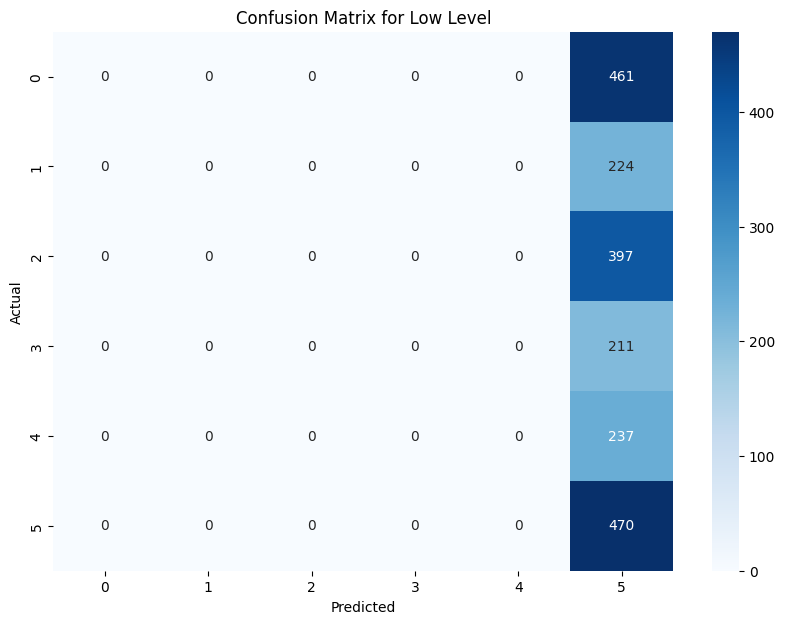

In [61]:
cm_3 = confusion_matrix(Y_test, y_pred_classes_3)
plt.figure(figsize=(10,7))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Low Level')
plt.show()